In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.model_selection import train_test_split
from PIL import UnidentifiedImageError
from keras.utils import to_categorical

In [10]:
base_dir = 'Data'

In [11]:
# Print the base directory
print("Base directory:", base_dir)

# List the subdirectories (classes)
for subdir in os.listdir(base_dir):
    subdir_path = os.path.join(base_dir, subdir)
    if os.path.isdir(subdir_path):
        print("Class directory:", subdir_path)
        # List a few images in each class directory
        for img in os.listdir(subdir_path)[:5]:  # Print first 5 images
            print("  Image:", img)

Base directory: Data
Class directory: Data\Bank Statement
  Image: 1.jpg
  Image: 10.jpg
  Image: 11.jpg
  Image: 12.jpg
  Image: 13.jpg
Class directory: Data\Check
  Image: 1.jpg
  Image: 10.jpg
  Image: 100.jpg
  Image: 11.jpg
  Image: 12.jpg
Class directory: Data\Salary Slip
  Image: 1.jpg
  Image: 10.jpg
  Image: 100.jpg
  Image: 101.jpg
  Image: 102.jpg
Class directory: Data\Utility
  Image: 1.jpg
  Image: 10.jpg
  Image: 100.jpg
  Image: 11.jpg
  Image: 12.jpg


In [12]:
# define a fucntion to load data 

def load_data(base_dir, img_size=(150, 150)):
    x = []
    y = []
    class_names = sorted(os.listdir(base_dir))
    class_indices = {class_name: idx for idx, class_name in enumerate(class_names)}

    for class_name in class_names:
        class_dir = os.path.join(base_dir, class_name)
        if os.path.isdir(class_dir):
            for img_name in os.listdir(class_dir):
                img_path = os.path.join(class_dir, img_name)
                try:
                    img = load_img(img_path, target_size=img_size)
                    img_array = img_to_array(img)
                    x.append(img_array)
                    y.append(class_indices[class_name])
                except UnidentifiedImageError:
                    print(f"Skipping file {img_path}, as it is not a valid image.")
                except Exception as e:
                    print(f"An error occurred while processing file {img_path}: {e}")

    x = np.array(x, dtype='float32') / 255.0  # normalize images to [0, 1]
    y = np.array(y, dtype='int32')
    return x, y, class_names

In [13]:
img_size = (150, 150)

x, y, class_names = load_data(base_dir, img_size)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# shape
print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_test shape: {y_test.shape}')

c:\Users\Admin\miniconda3\envs\dsi_participant\lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Skipping file Data\Utility\53.jpg, as it is not a valid image.
Skipping file Data\Utility\86.jpg, as it is not a valid image.
x_train shape: (307, 150, 150, 3)
y_train shape: (307,)
x_test shape: (77, 150, 150, 3)
y_test shape: (77,)


x_train shape: (307, 150, 150, 3)
y_train shape: (307, 1)
x_test shape: (77, 150, 150, 3)
y_test shape: (77, 1)
Image dimensions: (150, 150, 3)
Number of classes: 4


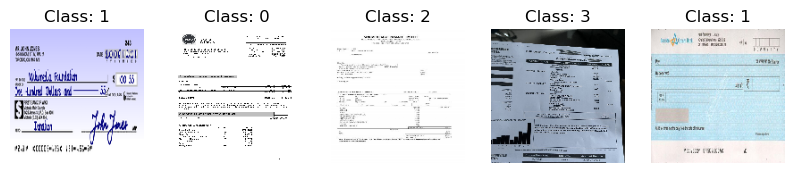

In [14]:
# reshape
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# shape
print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_test shape: {y_test.shape}')

# dimension
print(f"Image dimensions: {x_train.shape[1:]}")

# number of classes
num_classes = len(class_names)
print(f"Number of classes: {num_classes}")

# display a few examples
fig, axes = plt.subplots(1, 5, figsize=(10, 5))
for i in range(5):
    k = np.random.randint(0, x_train.shape[0])
    axes[i].imshow(x_train[k]) # images
    axes[i].set_title(f"Class: {y_train[k][0]}") # labels
    axes[i].axis('off')  

plt.show()


In [15]:
# one-hot encode the labels
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# split
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42)


print(f"Training data shape: {x_train.shape}")
print(f"Validation data shape: {x_val.shape}")
print(f"Test data shape: {x_test.shape}")

print(f"Training labels shape: {y_train.shape}")
print(f"Validation labels shape: {y_val.shape}")
print(f"Test labels shape: {y_test.shape}")

Training data shape: (245, 150, 150, 3)
Validation data shape: (62, 150, 150, 3)
Test data shape: (77, 150, 150, 3)
Training labels shape: (245, 4)
Validation labels shape: (62, 4)
Test labels shape: (77, 4)


In [16]:
import pickle

# Export training and testing data
with open('Artifacts/preprocessed_data.pkl', 'wb') as file:
    pickle.dump(x_train, file)
    pickle.dump(y_train, file)
    pickle.dump(x_val, file)
    pickle.dump(y_val, file)
    pickle.dump(x_test, file)
    pickle.dump(y_test, file)